In [124]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [125]:

data = pd.read_csv('C:\\Users\\Usuario\\Downloads\\python_data\\data-analysis-mqam-1\\coronarias.csv', sep=';')

In [126]:
data.head()

,Index-original,SEXO,AH3,INFARTO,ANGEST,DIAB,ARTER,ARRIT,TABAG4,OBESO,IDADE1,ALTURA,PESO,IMC,COL,TRIG,PSR,PDR,GLO
0,3,1,0,0,0,0.0,0.0,0,NaN,0.0,28.0,1.69,62.0,21.71,213.0,136.0,12.0,8.0,0
1,5,1,0,1,0,0.0,0.0,0,0.0,0.0,64.0,1.80,87.0,26.85,184.0,110.0,13.0,8.0,0
2,7,1,1,0,0,0.0,0.0,0,0.0,0.0,44.0,1.70,60.0,20.76,NaN,243.0,13.0,6.0,1
3,9,1,1,1,0,1.0,0.0,0,2.0,0.0,62.0,1.81,80.0,24.42,255.0,324.0,17.0,8.0,0
4,12,0,2,1,0,1.0,2.0,0,0.0,0.0,30.0,1.65,70.0,25.71,220.0,189.0,16.0,10.0,1


In [127]:
list(data.columns)

['Index-original',
 'SEXO',
 'AH3',
 'INFARTO',
 'ANGEST',
 'DIAB',
 'ARTER',
 'ARRIT',
 'TABAG4',
 'OBESO',
 'IDADE1',
 'ALTURA',
 'PESO',
 'IMC',
 'COL',
 'TRIG',
 'PSR',
 'PDR',
 'GLO']

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index-original  500 non-null    int64  
 1   SEXO            500 non-null    int64  
 2   AH3             500 non-null    int64  
 3   INFARTO         500 non-null    int64  
 4   ANGEST          500 non-null    int64  
 5   DIAB            466 non-null    float64
 6   ARTER           493 non-null    float64
 7   ARRIT           500 non-null    int64  
 8   TABAG4          458 non-null    float64
 9   OBESO           483 non-null    float64
 10  IDADE1          500 non-null    float64
 11  ALTURA          483 non-null    float64
 12  PESO            495 non-null    float64
 13  IMC             483 non-null    float64
 14  COL             440 non-null    float64
 15  TRIG            424 non-null    float64
 16  PSR             497 non-null    float64
 17  PDR             497 non-null    flo

In [129]:
#Verificando se os valores nulos fazem sentido ou se causam distorções que vão prejudicar a análise
data.describe()

,Index-original,SEXO,AH3,INFARTO,ANGEST,DIAB,ARTER,ARRIT,TABAG4,OBESO,IDADE1,ALTURA,PESO,IMC,COL,TRIG,PSR,PDR,GLO
count,500.00000,500.000000,500.000000,500.000000,500.000000,466.000000,493.000000,500.000000,458.000000,483.000000,500.000000,483.000000,495.000000,483.000000,440.000000,424.000000,497.000000,497.000000,500.000000
mean,730.87000,0.704000,0.858000,0.342000,0.406000,0.180258,0.168357,0.126000,1.231441,0.095238,58.332000,1.656542,72.868687,26.438841,214.988636,172.051887,14.102616,8.492958,0.660000
std,428.60478,0.456948,0.816805,0.474855,0.491576,0.384815,0.500054,0.332182,1.188445,0.293848,11.264082,0.087039,12.944640,3.855676,55.532603,96.251160,2.229642,1.141435,0.474183
min,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.380000,42.000000,16.000000,74.000000,38.000000,9.000000,5.000000,0.000000
25%,360.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.600000,64.000000,24.020000,179.000000,110.000000,12.000000,8.000000,0.000000
50%,721.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,59.000000,1.660000,72.000000,26.060000,213.000000,151.000000,14.000000,8.000000,1.000000
75%,1089.25000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,66.000000,1.720000,80.000000,28.410000,242.000000,213.500000,16.000000,9.000000,1.000000
max,1497.00000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,87.000000,1.860000,136.000000,42.920000,620.000000,888.000000,23.000000,14.000000,1.000000


In [130]:
colunas_quantitativas = ['IDADE1', 'ALTURA', 'PESO', 'IMC', 'PSR', 'PDR', 'COL' ,'TRIG']
colunas_categoricas =['SEXO', 'DIAB', 'AH3', 'ANGEST', 'ARTER', 'ARRIT', 'OBESO', 'TABAG4', 'INFARTO','GLO']

In [131]:
# Imputar média nas quantitativas e moda nas categóricas

# Quantitativas -> média
for c in colunas_quantitativas:
    if c in data.columns:
        data[c] = pd.to_numeric(data[c], errors='coerce')
        media_c = data[c].mean(skipna=True)
        data[c] = data[c].fillna(media_c)
# Categóricas -> moda
for c in colunas_categoricas:
    if c in data.columns:
        moda_vals = data[c].mode(dropna=True)
        if not moda_vals.empty:
            data[c] = data[c].fillna(moda_vals.iloc[0])



In [132]:

# Lista para armazenar os resultados
resultados = []

for col in colunas_quantitativas:
    media_amostral = data[col].mean()
    mediana = data[col].median()
    moda = data[col].mode()[0]
    variancia_amostral = data[col].var()
    dp_amostral = data[col].std()
    coef_var = dp_amostral / media_amostral if media_amostral != 0 else None
    q1 = data[col].quantile(0.25)
    q2 = data[col].quantile(0.5)
    q3 = data[col].quantile(0.75)
    resultados.append({
        'variavel': col,
        'media_amostral': media_amostral,
        'mediana': mediana,
        'moda': moda,
        'variancia_amostral': variancia_amostral,
        'dp_amostral': dp_amostral,
        'coeficiente_variacao': coef_var,
        'quartil_1': q1,
        'quartil_2': q2,
        'quartil_3': q3
    })

# Criando DataFrame e salvando em CSV
df_resultados = pd.DataFrame(resultados)
# df_resultados.to_csv('variaveis_quantitativas.csv', index=False)
print(df_resultados)

  variavel  media_amostral     mediana        moda  variancia_amostral  \
0   IDADE1       58.332000   59.000000   60.000000          126.879535   
1   ALTURA        1.656542    1.660000    1.700000            0.007318   
2     PESO       72.868687   72.000000   67.000000          165.884699   
3      IMC       26.438841   26.275000   26.438841           14.359773   
4      PSR       14.102616   14.000000   14.000000            4.941416   
5      PDR        8.492958    8.000000    8.000000            1.295041   
6      COL      214.988636  214.988636  214.988636         2713.064014   
7     TRIG      172.051887  168.000000  172.051887         7853.292302   

   dp_amostral  coeficiente_variacao  quartil_1   quartil_2  quartil_3  
0    11.264082              0.193103    52.0000   59.000000    66.0000  
1     0.085543              0.051640     1.6000    1.660000     1.7200  
2    12.879623              0.176751    64.0000   72.000000    80.0000  
3     3.789429              0.143328    2

In [133]:

#Dicionario de legendas
leg_sexo = {0: 'Feminino', 1: 'Masculino'}
leg_hereditario = {0: 'Sem parente', 1: '1 parente', 2: '2 ou mais parentes'}
leg_diabetes = {0: 'Não', 1: 'Sim'}
leg_arritimia= {0: 'Não', 1: 'Sim'}
leg_arter = {0: 'Não possui', 1: 'Arteriopatia Carotídea', 2: 'Arteriopatia Aortolíaca', 3: 'Arteriopatia Carotídea e Aortolíaca'}
leg_infarto = {0: 'Não', 1: 'Sim'}
leg_tabagismo = {0: 'Não Fumante', 1: 'Ex-Fumante', 2: 'Fumante Leve/Moderado', 3: 'Fumante Pesado'}
leg_angest = {0: 'Não', 1: 'Sim'}
leg_obesidade = {0: 'Não', 1: 'Sim'}
leg_lo3 = {0: 'Menor que 50%', 1: 'Maior ou igual a 50%'}

mapeamentos = {
    'SEXO': leg_sexo,
    'AH3': leg_hereditario,
    'DIAB': leg_diabetes,
    'ANGEST': leg_angest,
    'ARTER': leg_arter,
    'ARRIT': leg_arritimia,
    'OBESO': leg_obesidade,
    'TABAG4': leg_tabagismo,
    'INFARTO': leg_infarto,
    'GLO': leg_lo3
}

for col in colunas_categoricas:
    print(f"Tabela de frequências para: {col}")
    
    valores = data[col]
    if col in mapeamentos:
        valores = valores.map(mapeamentos[col])
    freq_abs = valores.value_counts()
    freq_rel = valores.value_counts(normalize=True)
    moda = valores.mode()[0]
    tabela = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa': freq_rel
    })
    print(tabela)
    print("\n")
    print(f"Moda: {moda}")
    print("\n")

#

Tabela de frequências para: SEXO
           Frequência Absoluta  Frequência Relativa
SEXO                                               
Masculino                  352                0.704
Feminino                   148                0.296


Moda: Masculino


Tabela de frequências para: DIAB
      Frequência Absoluta  Frequência Relativa
DIAB                                          
Não                   416                0.832
Sim                    84                0.168


Moda: Não


Tabela de frequências para: AH3
                    Frequência Absoluta  Frequência Relativa
AH3                                                         
Sem parente                         207                0.414
1 parente                           157                0.314
2 ou mais parentes                  136                0.272


Moda: Sem parente


Tabela de frequências para: ANGEST
        Frequência Absoluta  Frequência Relativa
ANGEST                                          
Não         

In [134]:
with open('analise_descritiva.csv', 'w', encoding='utf-8') as f:
    # Quantitativas
    f.write('Variáveis Quantitativas\n')
    df_resultados.to_csv(f, index=False)
    f.write('\n\nVariáveis Qualitativas/Categóricas\n')
    # Qualitativas
    for col in colunas_categoricas:
        valores = data[col]
        if col in mapeamentos:
            valores = valores.map(mapeamentos[col])
        freq_abs = valores.value_counts()
        freq_rel = valores.value_counts(normalize=True)
        moda = valores.mode()[0]
        tabela = pd.DataFrame({
            'Categoria': freq_abs.index,
            'Frequência Absoluta': freq_abs.values,
            'Frequência Relativa': freq_rel.values
        })
        f.write(f'\n{col}\n')
        tabela.to_csv(f, index=False)
        f.write(f'Moda: {moda}\n')

In [135]:
# Testar leitura do arquivo CSV
with open('analise_descritiva.csv', encoding='utf-8') as f:
    conteudo = f.read()
    print("Início do arquivo CSV:")
    print(conteudo[:1000])  # Mostra os primeiros 1000 caracteres

    # Visualizar seções
    print("\nSeção 'Variáveis Quantitativas':")
    inicio_quant = conteudo.find('Variáveis Quantitativas')
    fim_quant = conteudo.find('Variáveis Qualitativas')
    print(conteudo[inicio_quant:fim_quant])

    print("\nSeção 'Variáveis Qualitativas':")
    print(conteudo[fim_quant:fim_quant+2000])  # Mostra os primeiros 1000 caracteres da seção qualitativa



Início do arquivo CSV:
Variáveis Quantitativas
variavel,media_amostral,mediana,moda,variancia_amostral,dp_amostral,coeficiente_variacao,quartil_1,quartil_2,quartil_3

IDADE1,58.332,59.0,60.0,126.87953507014028,11.264081634564812,0.1931029560886788,52.0,59.0,66.0

ALTURA,1.656542443064182,1.66,1.7,0.007317687134102573,0.0855434809561931,0.05163977615807985,1.6,1.66,1.72

PESO,72.86868686868686,72.0,67.0,165.88469869030993,12.879623390856967,0.17675113885428886,64.0,72.0,80.0

IMC,26.438840579710146,26.275,26.438840579710142,14.359773448345967,3.7894291718339277,0.14332811457481362,24.0525,26.275,28.372500000000002

PSR,14.10261569416499,14.0,14.0,4.941416031257687,2.222929605556075,0.15762534084197022,12.0,14.0,16.0

PDR,8.492957746478872,8.0,8.0,1.2950407857969461,1.1379985877833707,0.13399320021993255,8.0,8.0,9.0

COL,214.98863636363635,214.98863636363637,214.98863636363637,2713.064014392421,52.08708106999682,0.24227829875573342,183.0,214.98863636363637,236.0

TRIG,172.05188679245282,

In [136]:
from scipy.stats import kstest, norm, probplot
from scipy import stats

# Teste de Kolmogorov-Smirnov para normalidade
for col in colunas_quantitativas:
    # Normalizando os dados da coluna
    col_data = data[col].dropna()
    col_mean = col_data.mean()
    col_std = col_data.std()
    # Testando contra a distribuição normal com mesma média e desvio padrão
    stat, p = kstest(col_data, 'norm', args=(col_mean, col_std))
    print(f"{col}: p-valor={p}")
    if p > 0.05:
        print("Distribuição provavelmente normal")
    else:
        print("Distribuição provavelmente não normal")

IDADE1: p-valor=0.10848681726895892
Distribuição provavelmente normal
ALTURA: p-valor=0.02611059162144358
Distribuição provavelmente não normal
PESO: p-valor=0.04136109368986873
Distribuição provavelmente não normal
IMC: p-valor=0.04380021664832412
Distribuição provavelmente não normal
PSR: p-valor=3.776642025389507e-11
Distribuição provavelmente não normal
PDR: p-valor=1.4855420314736352e-33
Distribuição provavelmente não normal
COL: p-valor=6.734630749627469e-06
Distribuição provavelmente não normal
TRIG: p-valor=8.354422654936632e-13
Distribuição provavelmente não normal



Figura 1:


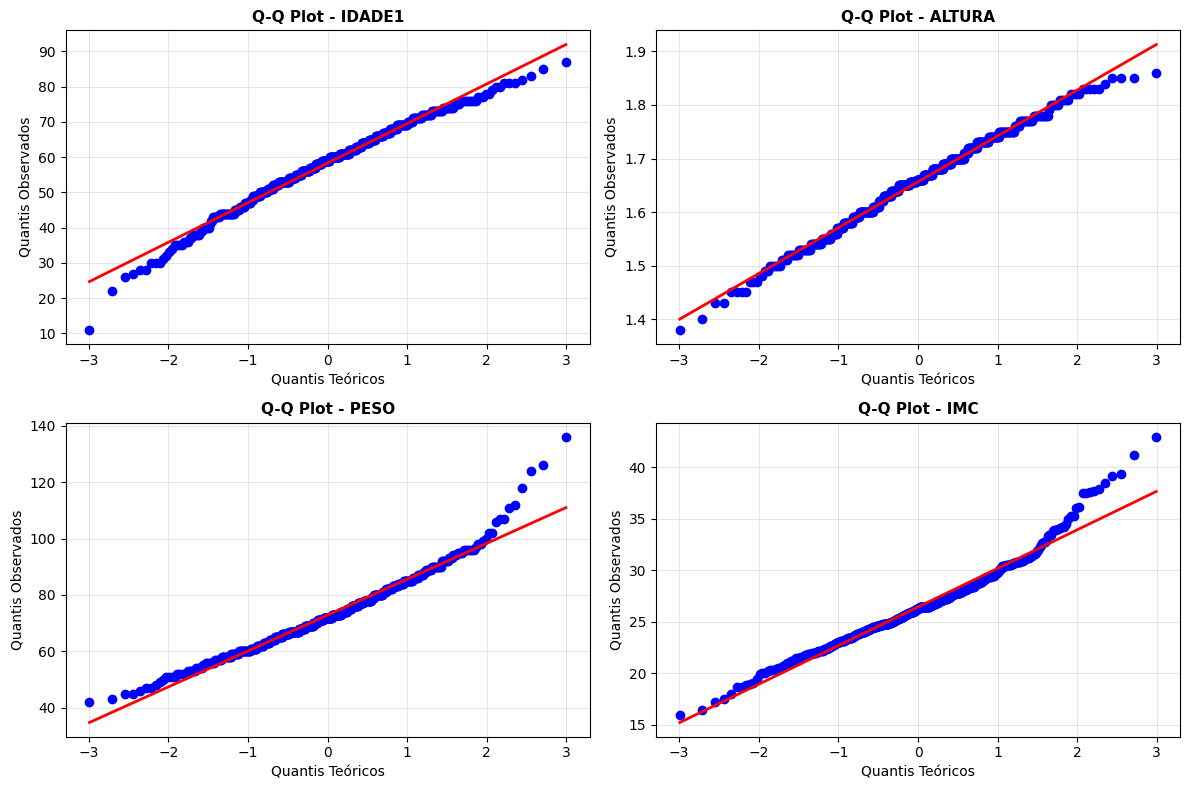


Figura 2:


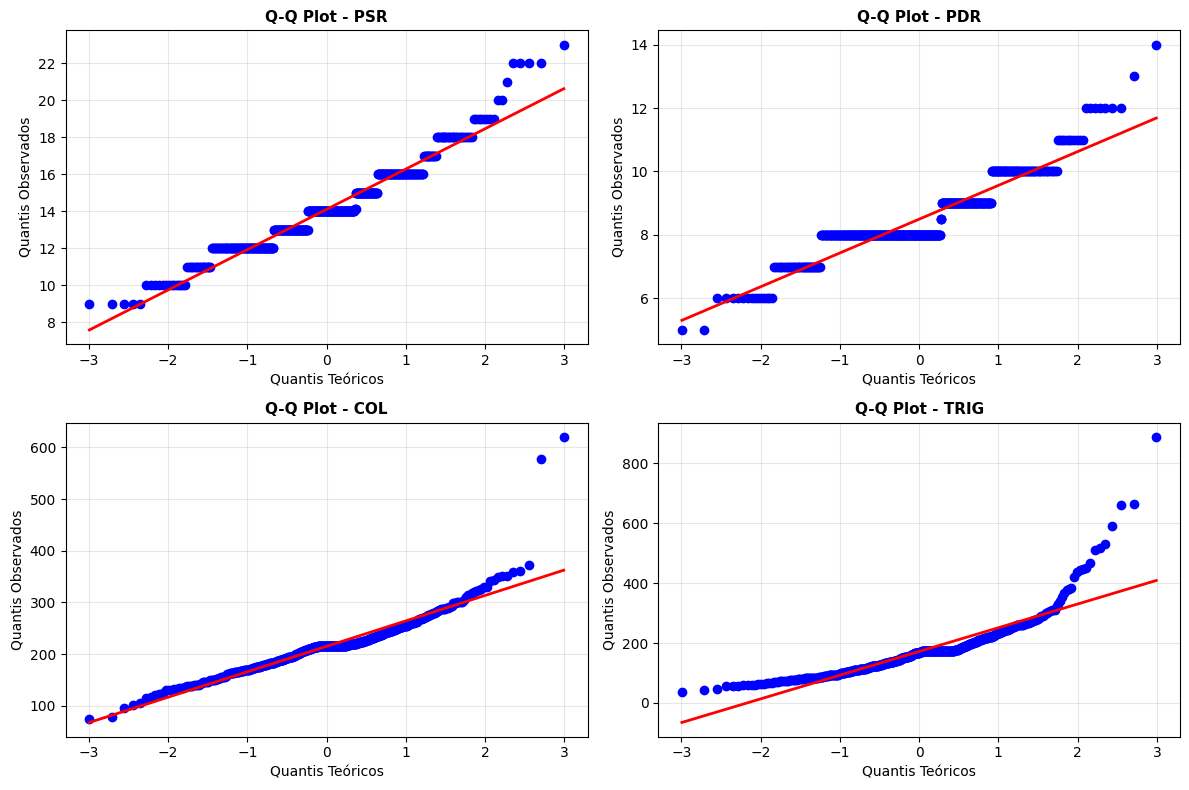

In [137]:
# Dividindo as colunas em grupos de 4
colunas_list = list(colunas_quantitativas)
grupos = [colunas_list[i:i+4] for i in range(0, len(colunas_list), 4)]

for grupo_idx, grupo in enumerate(grupos):
    print(f"\nFigura {grupo_idx + 1}:")
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(grupo):
        col_data = data[col].dropna()
        
        stats.probplot(col_data, dist="norm", plot=axes[i])
        axes[i].set_title(f'Q-Q Plot - {col}', fontsize=11, fontweight='bold')
        axes[i].set_xlabel('Quantis Teóricos', fontsize=10)
        axes[i].set_ylabel('Quantis Observados', fontsize=10)
        axes[i].grid(True, alpha=0.3)
        axes[i].get_lines()[1].set_color('red')
        axes[i].get_lines()[1].set_linewidth(2)
    
    # Remove subplots vazios se o grupo tiver menos de 4 variáveis
    for i in range(len(grupo), 4):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

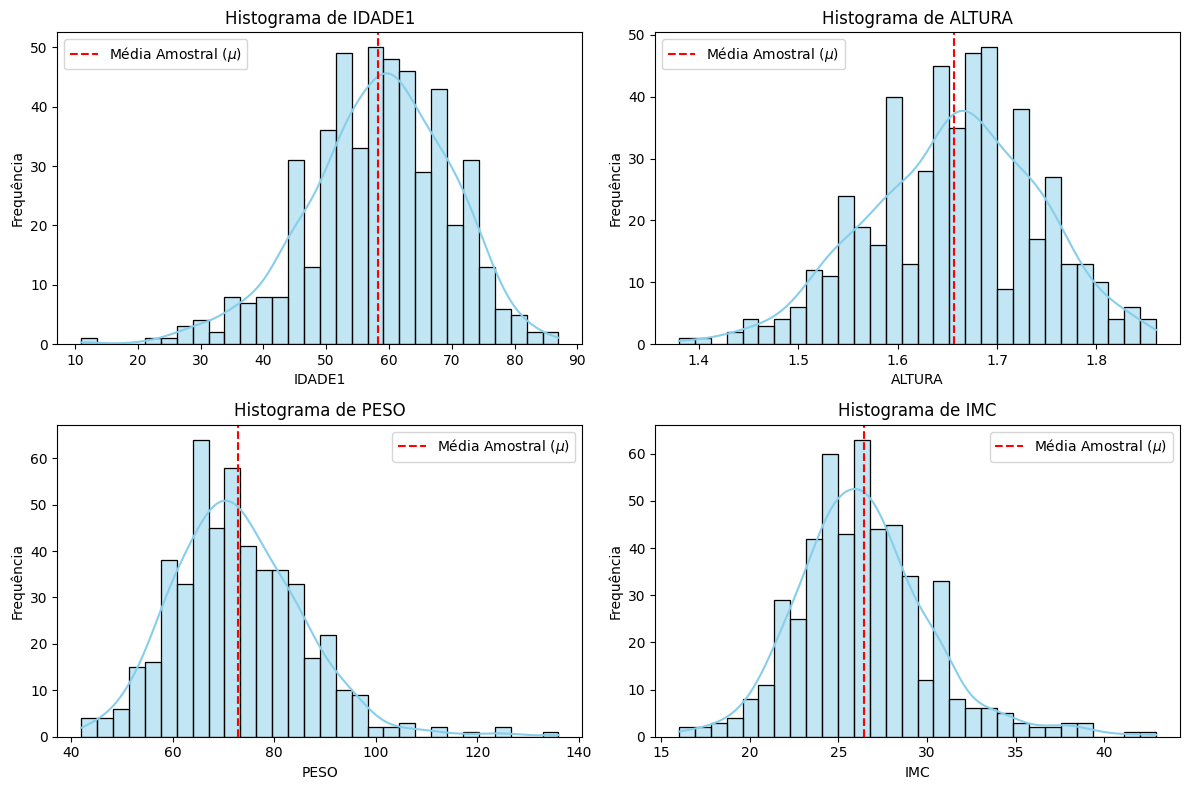

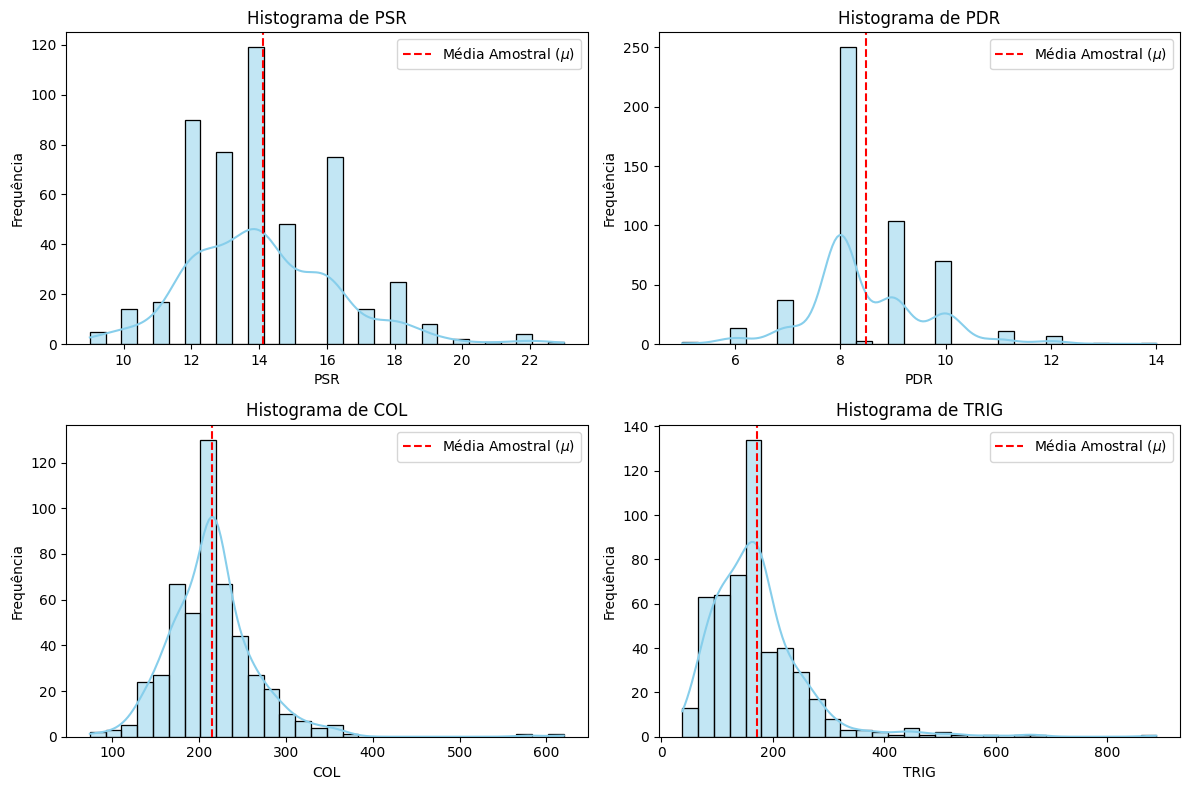

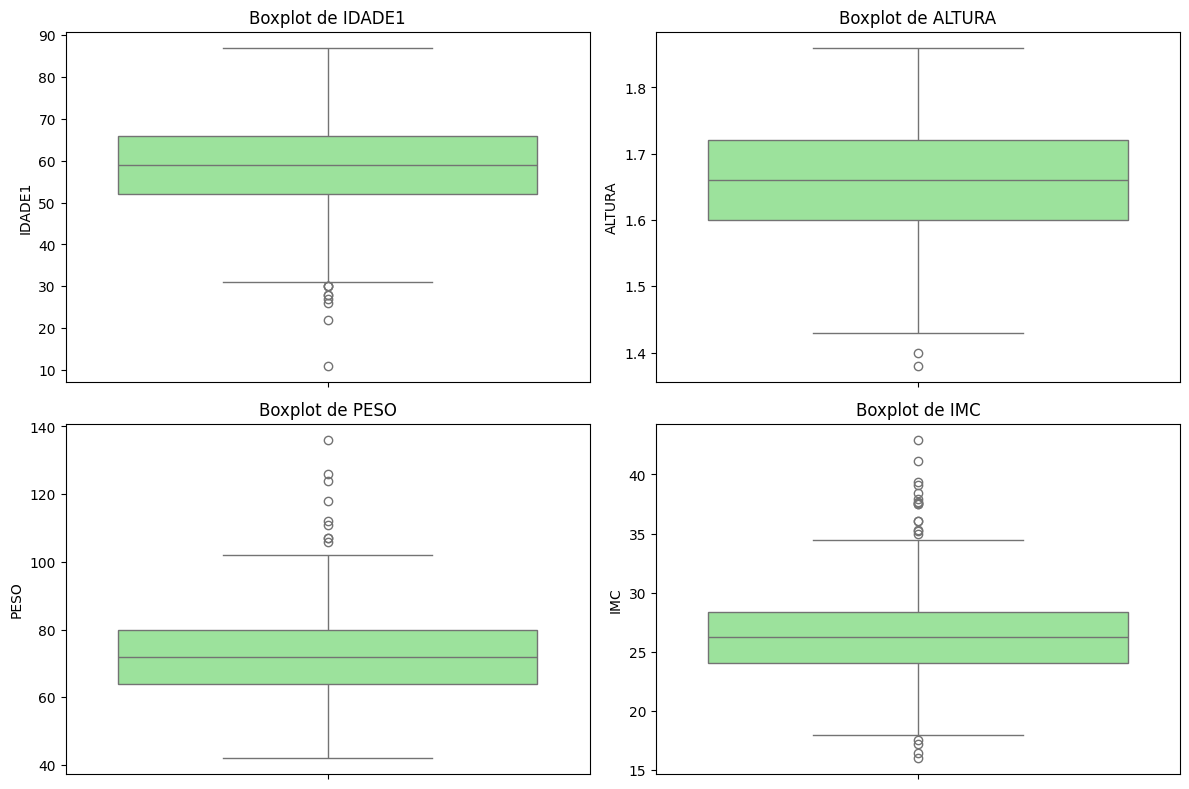

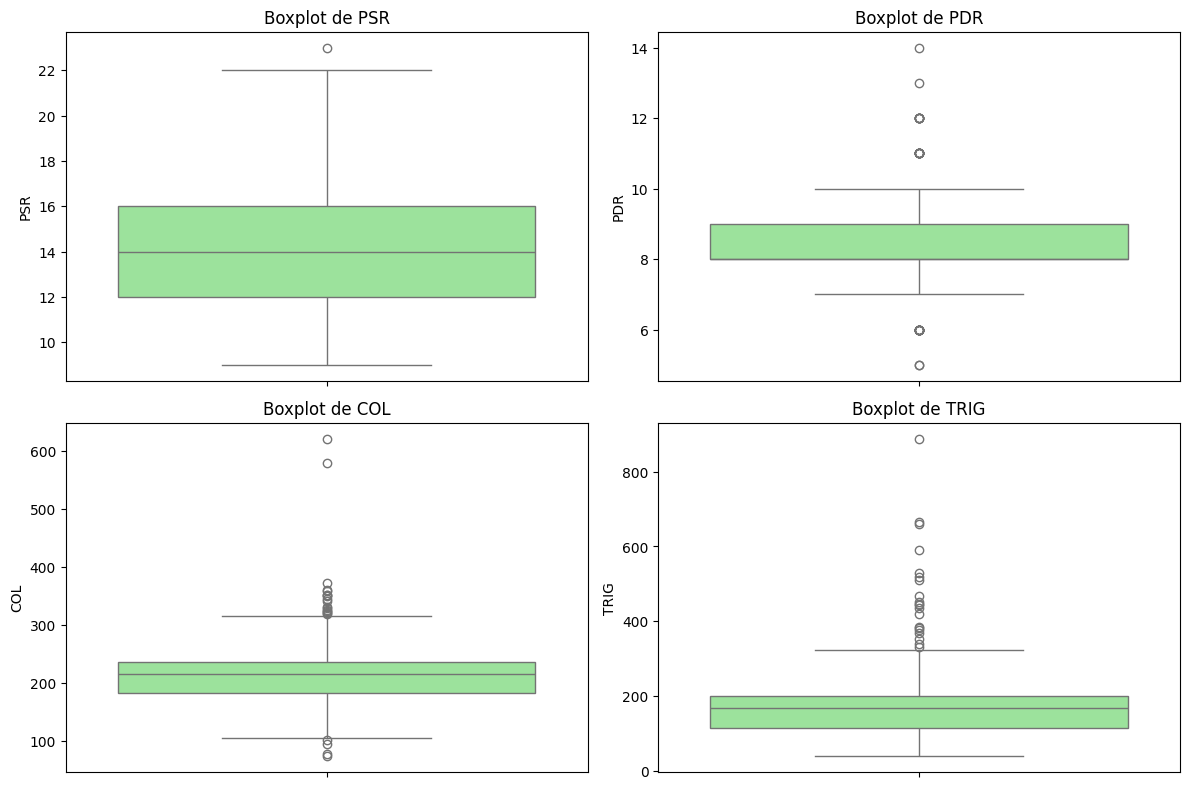

In [138]:
# Dividindo as variáveis em dois grupos
grupo1 = colunas_quantitativas[:4]
grupo2 = colunas_quantitativas[4:]

# Histogramas - Grupo 1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(grupo1):
    sns.histplot(data[col], bins=30, ax=axes[i], color='skyblue', kde=True)
    media_amostral = data[col].mean()
    axes[i].axvline(x=media_amostral, color='red', linestyle='--', label='Média Amostral ($\\mu$)')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Histogramas - Grupo 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(grupo2):
    sns.histplot(data[col], bins=30, ax=axes[i], color='skyblue', kde=True)
    media_amostral = data[col].mean()
    axes[i].axvline(x=media_amostral, color='red', linestyle='--', label='Média Amostral ($\\mu$)')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Boxplots - Grupo 1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(grupo1):
    sns.boxplot(y=data[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# Boxplots - Grupo 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(grupo2):
    sns.boxplot(y=data[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [139]:
def contar_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Limites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contar outliers
    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    return len(outliers), outliers

# Contagem de outliers para cada variável quantitativa      
for col in colunas_quantitativas:
    num_outliers, outlier_values = contar_outliers(data[col])
    print(f"{col}: {num_outliers} outliers")
    if num_outliers > 0:
        print(f"Valores dos outliers: {outlier_values.values}")
        print("\n")


IDADE1: 9 outliers
Valores dos outliers: [28. 30. 22. 11. 26. 28. 30. 27. 30.]


ALTURA: 2 outliers
Valores dos outliers: [1.4  1.38]


PESO: 9 outliers
Valores dos outliers: [112. 118. 124. 107. 136. 126. 111. 106. 107.]


IMC: 19 outliers
Valores dos outliers: [35.29 35.26 17.24 37.57 37.5  37.66 39.14 36.1  37.5  37.91 36.07 42.92
 16.41 41.14 39.33 38.47 16.   35.   17.51]


PSR: 1 outliers
Valores dos outliers: [23.]


PDR: 36 outliers
Valores dos outliers: [ 6.  6. 11. 13. 11. 11. 11.  6.  6. 11. 12. 11. 11. 12.  6. 11.  6. 12.
  5.  6.  6.  6. 11. 14. 11. 11. 12.  6.  6.  6. 12. 12. 12.  6.  5.  6.]


COL: 21 outliers
Valores dos outliers: [321. 360. 341. 344. 325. 102. 323. 330. 350. 372. 324. 352.  96. 578.
 620. 318.  78. 351.  74. 359. 329.]


TRIG: 20 outliers
Valores dos outliers: [452. 530. 517. 590. 510. 331. 340. 446. 420. 444. 381. 367. 888. 436.
 665. 377. 383. 353. 660. 468.]




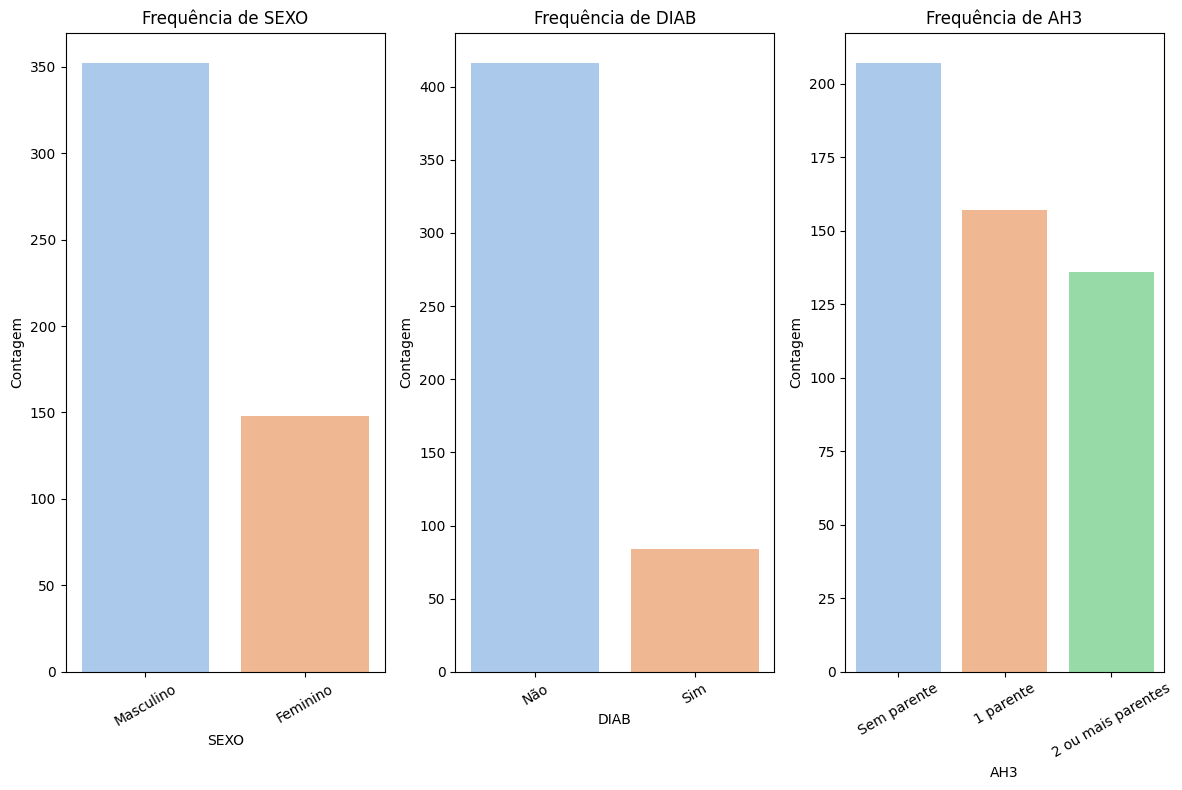

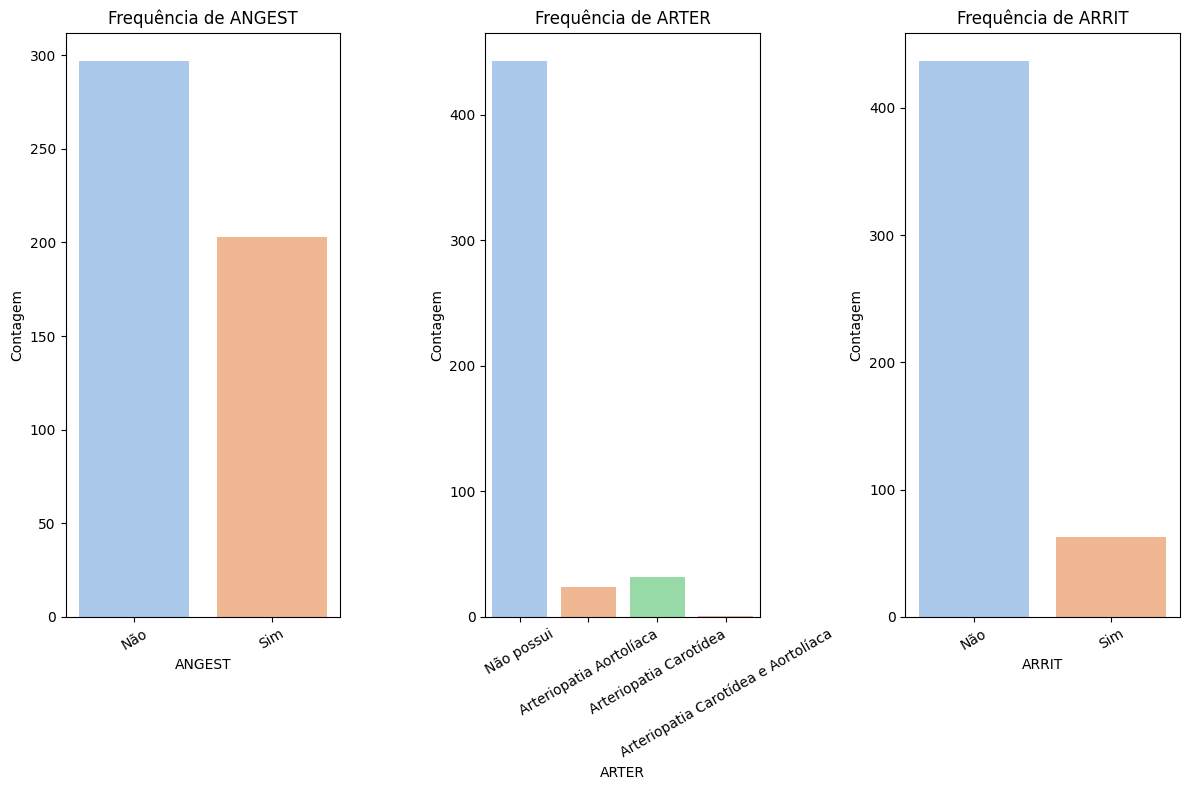

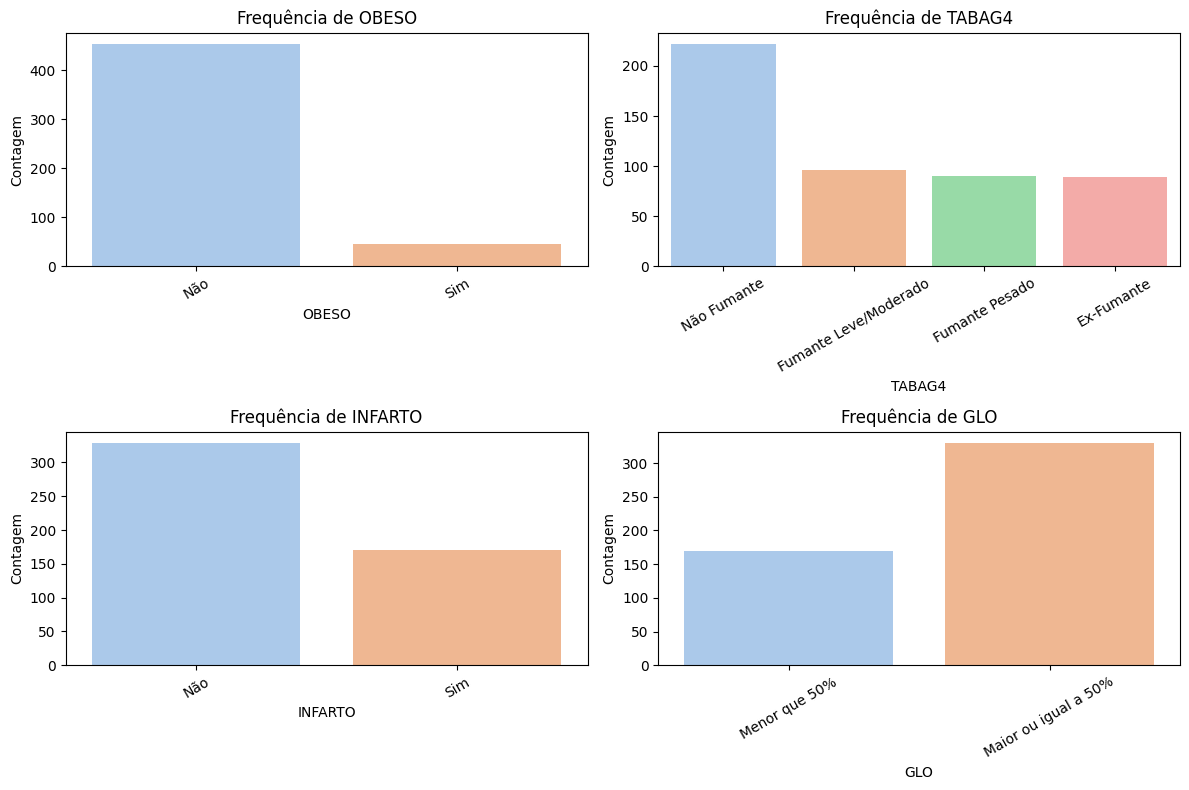

In [140]:

# Dividindo variáveis categóricas em dois grupos
cat_grupo1 = colunas_categoricas[:3]
cat_grupo2 = colunas_categoricas[3:6]
cat_grupo3 = colunas_categoricas[6:]

# Gráficos de barras - Grupo 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(cat_grupo1):
    valores = data[col]
    if col in mapeamentos:
        valores = valores.map(mapeamentos[col])
    sns.countplot(x=valores, ax=axes[i], hue=valores, legend=False, palette='pastel')
    axes[i].set_title(f'Frequência de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

# Gráficos de barras - Grupo 2
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(cat_grupo2):
    valores = data[col]
    if col in mapeamentos:
        valores = valores.map(mapeamentos[col])
    sns.countplot(x=valores, ax=axes[i], hue=valores, legend=False, palette='pastel')
    axes[i].set_title(f'Frequência de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

#Gráficos de barras - Grupo 3
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(cat_grupo3):
    valores = data[col]
    if col in mapeamentos:
        valores = valores.map(mapeamentos[col])
    sns.countplot(x=valores, ax=axes[i], hue=valores, legend=False, palette='pastel')
    axes[i].set_title(f'Frequência de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()